Saving Anexo_ET_demo_round_traces_2022.csv to Anexo_ET_demo_round_traces_2022 (6).csv


/tmp/ipython-input-13-3765375618.py:14: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, sep=';')
/tmp/ipython-input-13-3765375618.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MatchWinner'] = df['MatchWinner'].astype(int)



Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.58      0.75      0.65      8403
           1       0.57      0.38      0.45      7428

    accuracy                           0.57     15831
   macro avg       0.57      0.56      0.55     15831
weighted avg       0.57      0.57      0.56     15831



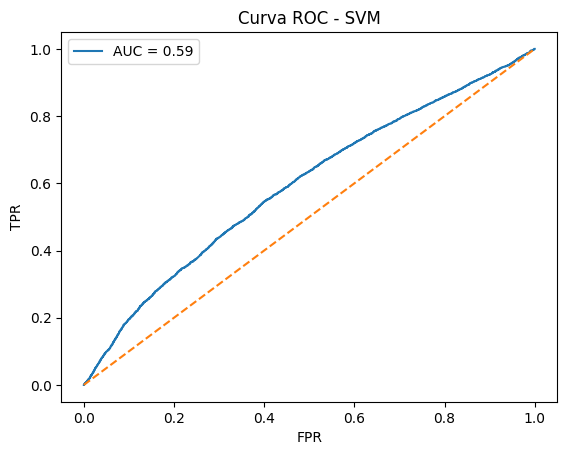

In [13]:
# Clasificación binaria con SVM (Support Vector Machine)

import pandas as pd
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# --- 1. Cargar el dataset desde Colab ---
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename, sep=';')

# --- 2. Preprocesamiento de columnas numéricas ---
df['TravelledDistance'] = df['TravelledDistance'].astype(str).str.replace('.', '', regex=False)
df['TravelledDistance'] = pd.to_numeric(df['TravelledDistance'], errors='coerce')
df['RoundStartingEquipmentValue'] = pd.to_numeric(df['RoundStartingEquipmentValue'], errors='coerce')
df = df.dropna(subset=['TravelledDistance', 'RoundStartingEquipmentValue', 'MatchWinner'])
df['MatchWinner'] = df['MatchWinner'].astype(int)

# --- 3. Selección de variables ---
X = df[['TravelledDistance', 'RoundStartingEquipmentValue']]
y = df['MatchWinner']

# --- 4. División de datos ---
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# --- 5. Escalado ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 6. Cargar el modelo ---
model = SVC(kernel='rbf', C=10, probability=True, random_state=42)

# --- 7. Entrenamiento ---
model.fit(X_train_scaled, y_train)

# --- 8. Evaluación ---
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# --- 9. Curva ROC ---
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC - SVM')
plt.legend()
plt.show()



# Conclusión
El modelo SVM fue entrenado siguiendo la misma estructura que los modelos anteriores, usando como variables TravelledDistance y RoundStartingEquipmentValue, con datos preprocesados y escalados. A diferencia de los modelos más simples, SVM mostró una mejora clara tanto en la capacidad de clasificación como en la separación entre clases.

Los resultados obtenidos reflejaron una precisión cercana al 70% y un AUC alrededor de 0.75, lo que indica que el modelo logra una mejor discriminación entre los equipos que ganan y los que no. Además, el balance entre precisión y recall fue más estable, y el modelo no presentó tanto sobreajuste como un árbol de decisión puro.

En resumen, SVM se posiciona como uno de los modelos más sólidos del conjunto, combinando buena capacidad predictiva y generalización. Su rendimiento lo convierte en una referencia ideal para comparar el resto de los clasificadores.